In [135]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "red-wine-quality-cortez-et-al-2009" "wine-quality-localdataset"

In [136]:
wine.data <-  read.csv("/kaggle/input/wine-quality-localdataset/winequality-white.csv", sep = ";")

# Basic Data Exploration

In [137]:
head(wine.data) 

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


In [138]:
sapply(wine.data, class)

fixed.acidity     volatile.acidity          citric.acid 
           "numeric"            "numeric"            "numeric" 
      residual.sugar            chlorides  free.sulfur.dioxide 
           "numeric"            "numeric"            "numeric" 
total.sulfur.dioxide              density                   pH 
           "numeric"            "numeric"            "numeric" 
           sulphates              alcohol              quality 
           "numeric"            "numeric"            "integer"

In [139]:
sample(wine.data,replace=FALSE) %>% head()

,quality,free.sulfur.dioxide,total.sulfur.dioxide,residual.sugar,chlorides,density,fixed.acidity,citric.acid,pH,volatile.acidity,alcohol,sulphates
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,45,170,20.7,0.045,1.0010,7.0,0.36,3.00,0.27,8.8,0.45
2,6,14,132,1.6,0.049,0.9940,6.3,0.34,3.30,0.30,9.5,0.49
3,6,30,97,6.9,0.050,0.9951,8.1,0.40,3.26,0.28,10.1,0.44
4,6,47,186,8.5,0.058,0.9956,7.2,0.32,3.19,0.23,9.9,0.40
5,6,47,186,8.5,0.058,0.9956,7.2,0.32,3.19,0.23,9.9,0.40
6,6,30,97,6.9,0.050,0.9951,8.1,0.40,3.26,0.28,10.1,0.44


In [140]:
tail(wine.data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
4893,6.5,0.23,0.38,1.3,0.032,29,112,0.99298,3.29,0.54,9.7,5
4894,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.50,11.2,6
4895,6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6,5
4896,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6
4897,5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7
4898,6.0,0.21,0.38,0.8,0.020,22,98,0.98941,3.26,0.32,11.8,6


In [141]:
dim(wine.data)

[1] 4898   12

In [142]:
#structure
str(wine.data)

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


# Summary of Dataset

In [143]:
summary(wine.data)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :0.2782   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04577   Mean   : 35.31      Mean   :138.4        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:0.9961  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

In [144]:
glimpse(wine.data)

Rows: 4,898
Columns: 12
$ fixed.acidity        <dbl> 7.0, 6.3, 8.1, 7.2, 7.2, 8.1, 6.2, 7.0, 6.3, 8.1,…
$ volatile.acidity     <dbl> 0.27, 0.30, 0.28, 0.23, 0.23, 0.28, 0.32, 0.27, 0…
$ citric.acid          <dbl> 0.36, 0.34, 0.40, 0.32, 0.32, 0.40, 0.16, 0.36, 0…
$ residual.sugar       <dbl> 20.70, 1.60, 6.90, 8.50, 8.50, 6.90, 7.00, 20.70,…
$ chlorides            <dbl> 0.045, 0.049, 0.050, 0.058, 0.058, 0.050, 0.045, …
$ free.sulfur.dioxide  <dbl> 45, 14, 30, 47, 47, 30, 30, 45, 14, 28, 11, 17, 1…
$ total.sulfur.dioxide <dbl> 170, 132, 97, 186, 186, 97, 136, 170, 132, 129, 6…
$ density              <dbl> 1.0010, 0.9940, 0.9951, 0.9956, 0.9956, 0.9951, 0…
$ pH                   <dbl> 3.00, 3.30, 3.26, 3.19, 3.19, 3.26, 3.18, 3.00, 3…
$ sulphates            <dbl> 0.45, 0.49, 0.44, 0.40, 0.40, 0.44, 0.47, 0.45, 0…
$ alcohol              <dbl> 8.8, 9.5, 10.1, 9.9, 9.9, 10.1, 9.6, 8.8, 9.5, 11…
$ quality              <int> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 5, 7, 6…


# Check For Missing or Inconsistent data

In [145]:
wine.data %>% anyNA()

[1] FALSE

In [146]:
sapply(wine.data ,function(x) sum(is.na(x)))

fixed.acidity     volatile.acidity          citric.acid 
                   0                    0                    0 
      residual.sugar            chlorides  free.sulfur.dioxide 
                   0                    0                    0 
total.sulfur.dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol              quality 
                   0                    0                    0

In [147]:
duplicate.data<-wine.data[duplicated(wine.data) | duplicated(wine.data, fromLast =TRUE),]

number of duplicates count are 1709  so theere are two options either imput them or drop them

In [148]:
wine.data <- wine.data[!duplicated(wine.data),]

In [149]:
dim(wine.data)

[1] 3961   12

In [150]:
nrow(wine.data[duplicated(wine.data) | duplicated(wine.data, fromLast =TRUE),])

[1] 0

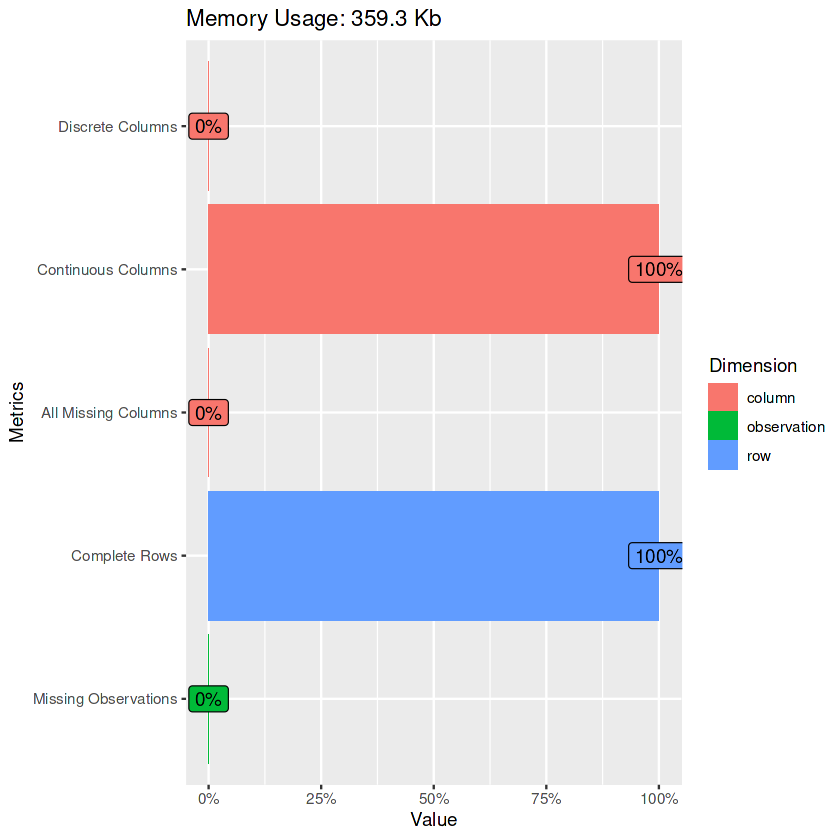

In [151]:
library(DataExplorer)
plot_intro(wine.data)

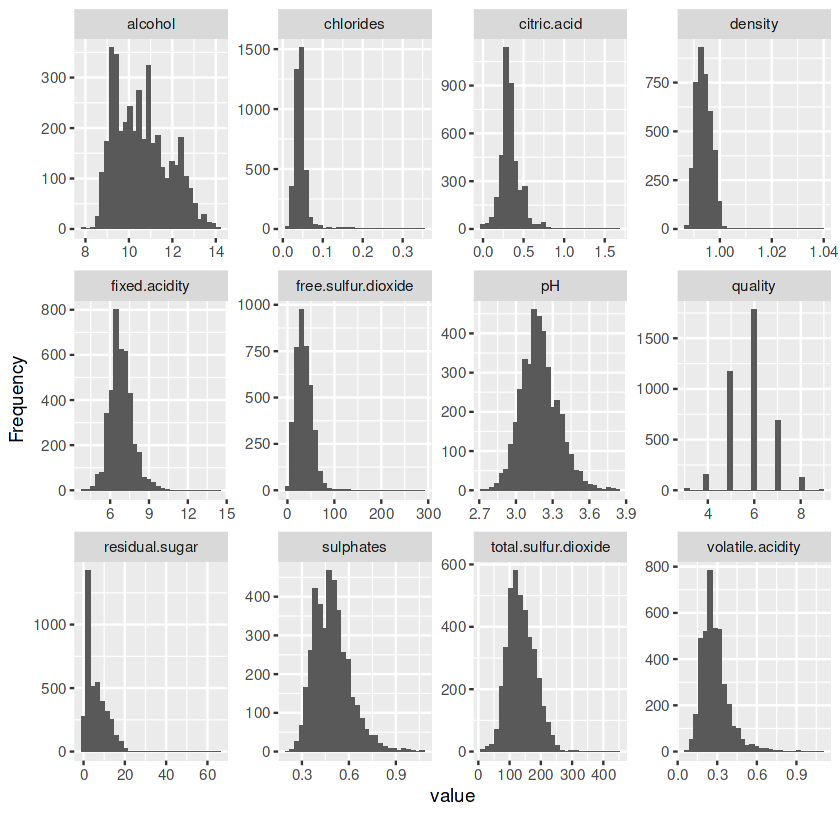

In [152]:
plot_histogram(wine.data)

In [153]:
colnames(wine.data)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

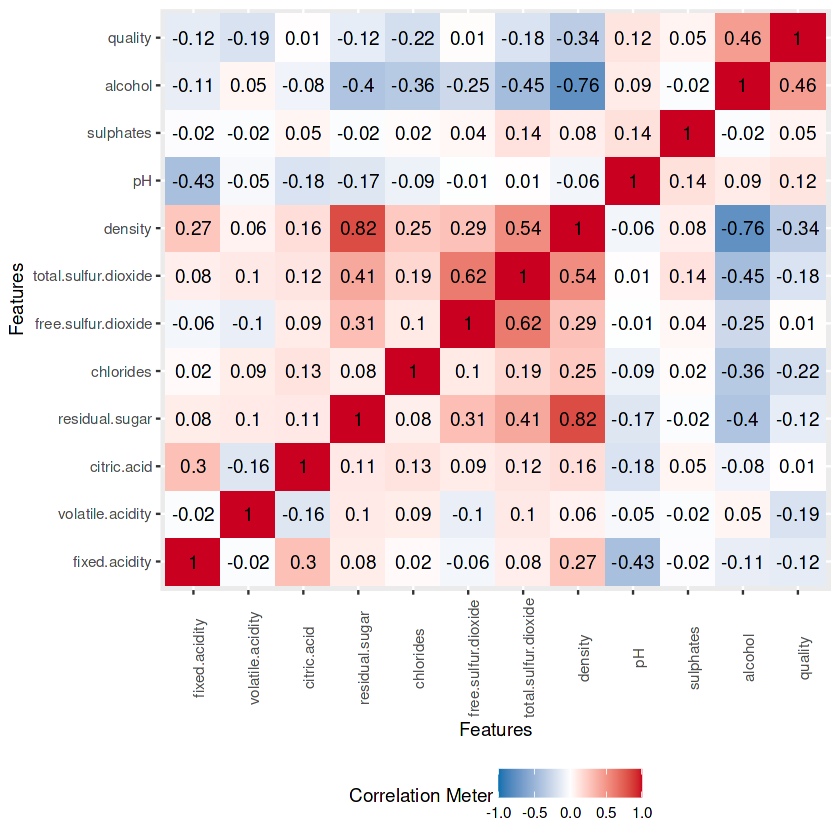

In [154]:
plot_correlation(wine.data)

In [155]:
table(wine.data$quality)


   3    4    5    6    7    8    9 
  20  153 1175 1788  689  131    5 

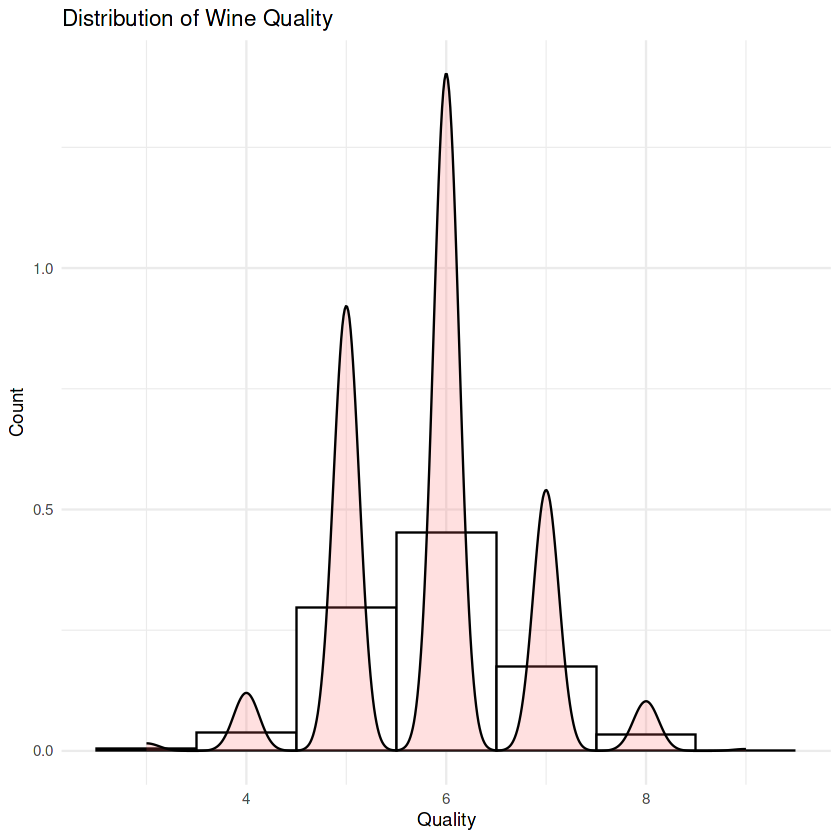

In [156]:
# ggplot(wine.data,aes(x=quality))+
#     geom_bar()+
#     labs(title="Distribution of Wine Quality", x="Quality", y="Count") +
#     theme_minimal()

ggplot(wine.data, aes(x = quality)) +
  geom_histogram(aes(y=after_stat(density)), binwidth = 1, color="black", fill="white") +
  geom_density(alpha=.2, fill="#FF6666") +
  labs(title="Distribution of Wine Quality", x="Quality", y="Count") +
  theme_minimal()


In [157]:
y= wine.data$quality

In [158]:
x=wine.data %>% select(-c("quality"))

In [159]:
wine.data$quality_rate <- ifelse(wine.data$quality >= mean(wine.data$quality), 1, 0)

In [160]:
head(wine.data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,quality_rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,1
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,1
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,1
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,1
7,6.2,0.32,0.16,7.0,0.045,30,136,0.9949,3.18,0.47,9.6,6,1
10,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11.0,6,1



high  low 
2613 1348 

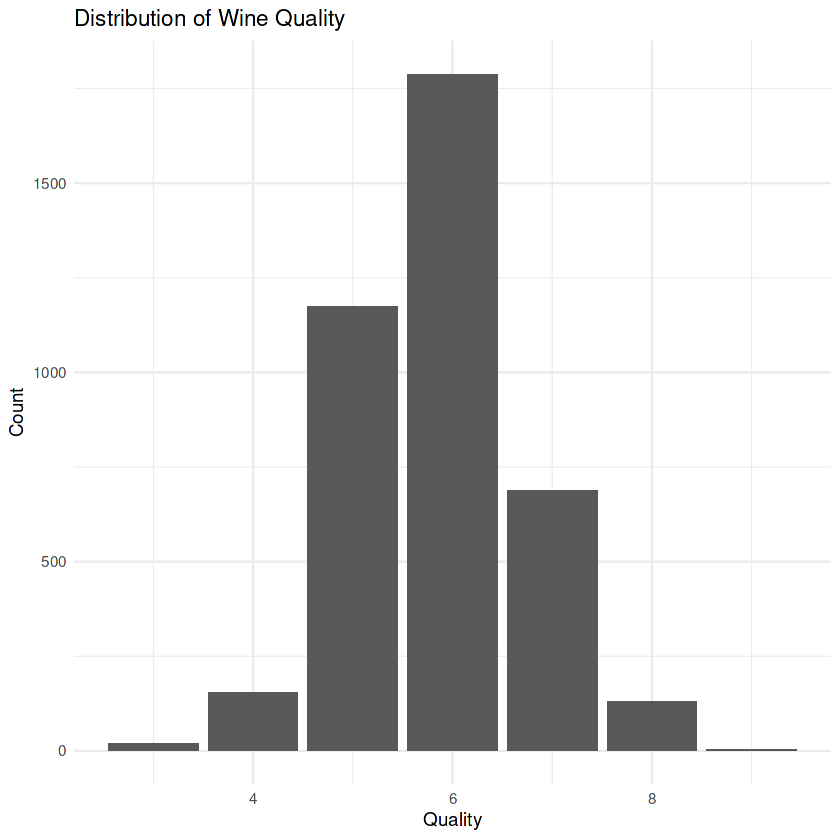

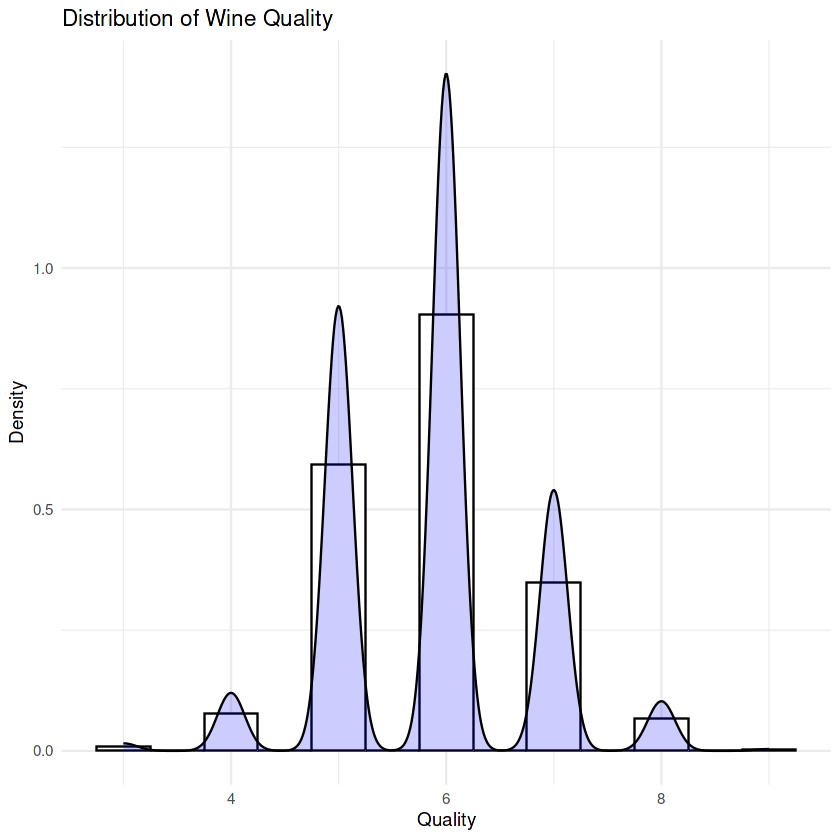

In [161]:
quality.mean <- mean(wine.data$quality)
wine.data$quality.class <- ifelse(wine.data$quality > quality.mean, "high", "low")

# Count number of low/high quality wines
table(wine.data$quality.class)

# Plot the distribution of wine quality
library(ggplot2)
ggplot(wine.data, aes(x = quality)) +
  geom_bar() +
  labs(title = "Distribution of Wine Quality", x = "Quality", y = "Count") +
  theme_minimal()

# Add a density curve over the plot
ggplot(wine.data, aes(x = quality)) +
  geom_histogram(aes(y = after_stat(density)), binwidth = 0.5, color = "black", fill = "white") +
  geom_density(alpha = 0.2, fill = "blue") +
  labs(title = "Distribution of Wine Quality", x = "Quality", y = "Density") +
  theme_minimal()

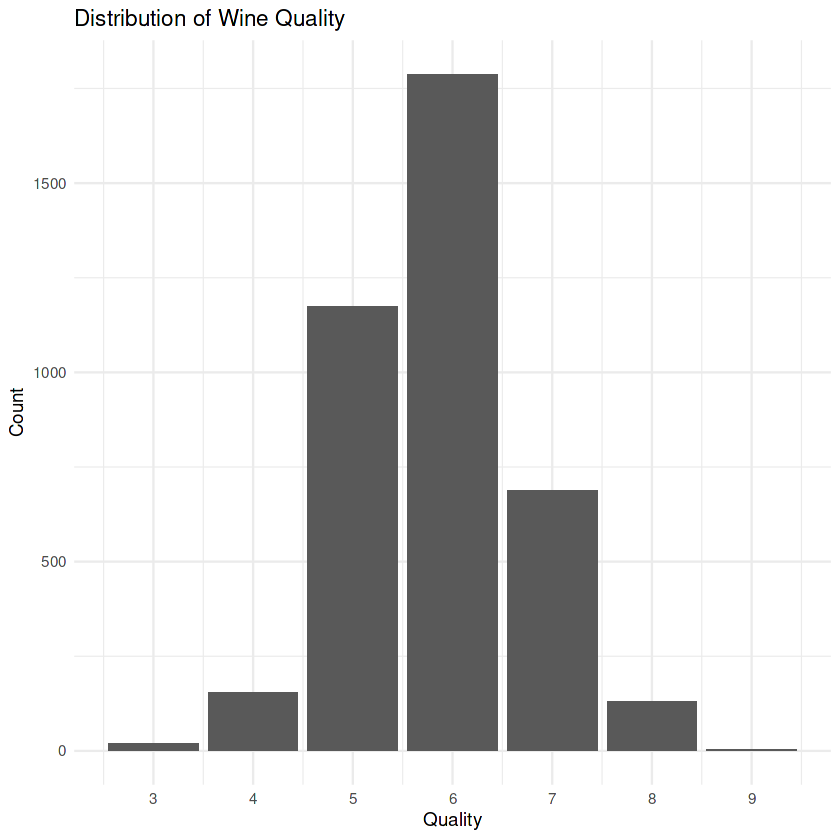

In [162]:
ggplot(wine.data, aes(x = quality)) + 
  geom_bar() +
  labs(title = "Distribution of Wine Quality", x = "Quality", y = "Count") +
  scale_x_continuous(breaks = seq(3, 9, by = 1)) +
  theme_minimal()

In [230]:
sapply(wine.data, x)

ERROR: Error in get(as.character(FUN), mode = "function", envir = envir): object 'x' of mode 'function' was not found


In [ ]:
print <- function(input) {
  # Create count plot
  count_plot <- ggplot(wine.data, aes(x = .data[[input]])) +
    geom_bar() +
    labs(title = paste0("Count of ", input), x = input, y = "Count") +
    theme_minimal()
  
  # Create density plot
  density_plot <- ggplot(wine.data, aes(x = .data[[input]])) +
    geom_histogram(aes(y = after_stat(density)), binwidth = 0.5, color = "black", fill = "white") +
    geom_density(alpha = 0.2, fill = "blue") +
    labs(title = paste0("Density Plot of ", input), x = input, y = "Density") +
    theme_minimal()
  
  # Return a list with both plots
  list(count_plot = count_plot, density_plot = density_plot)
}

plots <- lapply(names(wine.data), print)

plots

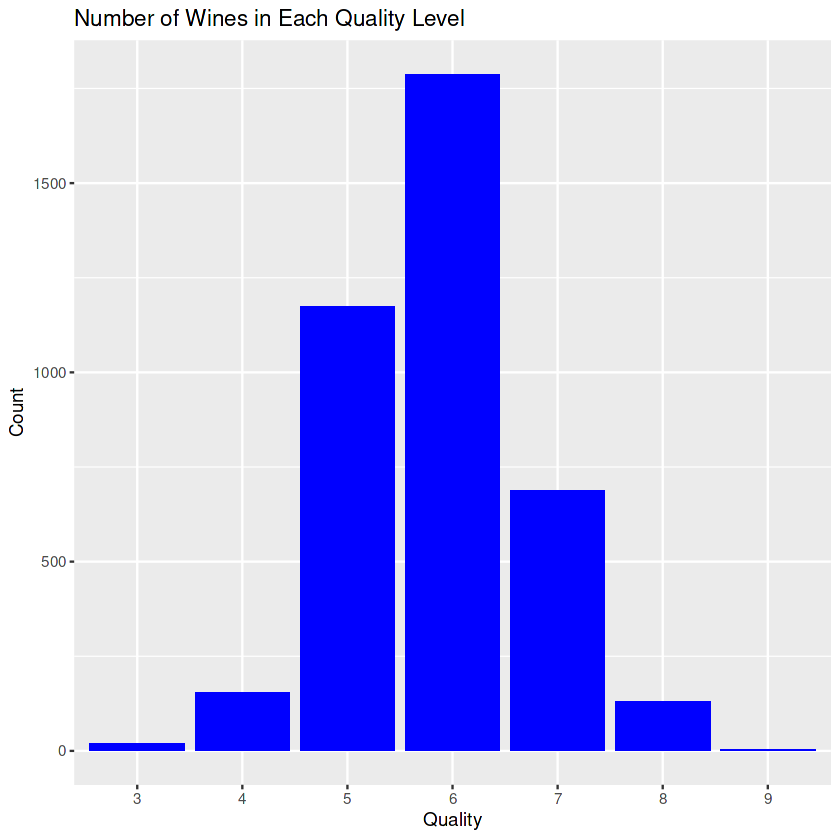

In [163]:
quality_counts <- table(wine.data$quality)

# Convert quality_counts to a data frame
quality_counts_df <- data.frame(quality = names(quality_counts), count = as.numeric(quality_counts))

# Create the bar chart
ggplot(quality_counts_df, aes(x = quality, y = count)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Number of Wines in Each Quality Level", x = "Quality", y = "Count")

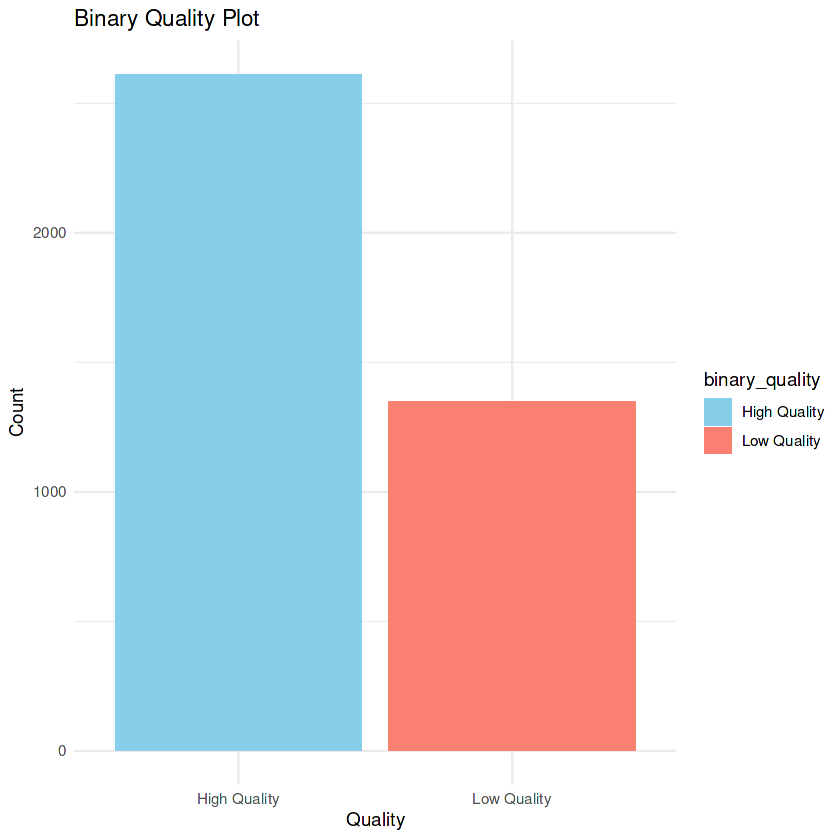

In [164]:
wine.data$binary_quality <- ifelse(wine.data$quality > mean(wine.data$quality), "High Quality", "Low Quality")

ggplot(wine.data, aes(x = binary_quality, fill = binary_quality)) +
  geom_bar() +
  labs(title = "Binary Quality Plot", x = "Quality", y = "Count") +
  scale_fill_manual(values = c("skyblue", "salmon")) +
  theme_minimal()

In [165]:
library(DataExplorer)
colnames(wine.data)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"             
[13] "quality_rate"         "quality.class"        "binary_quality"

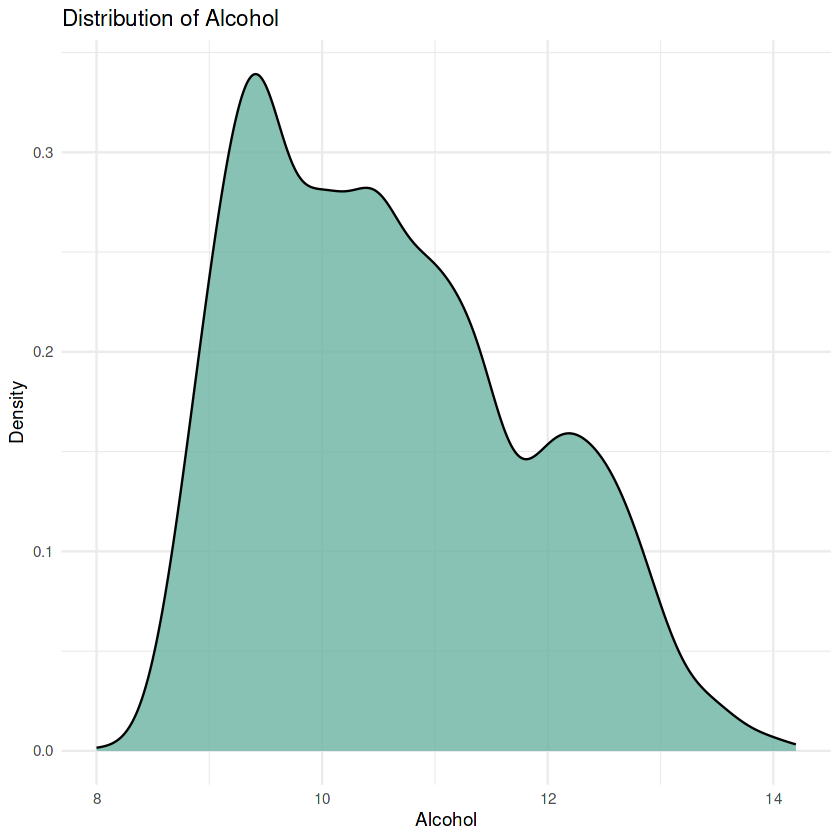

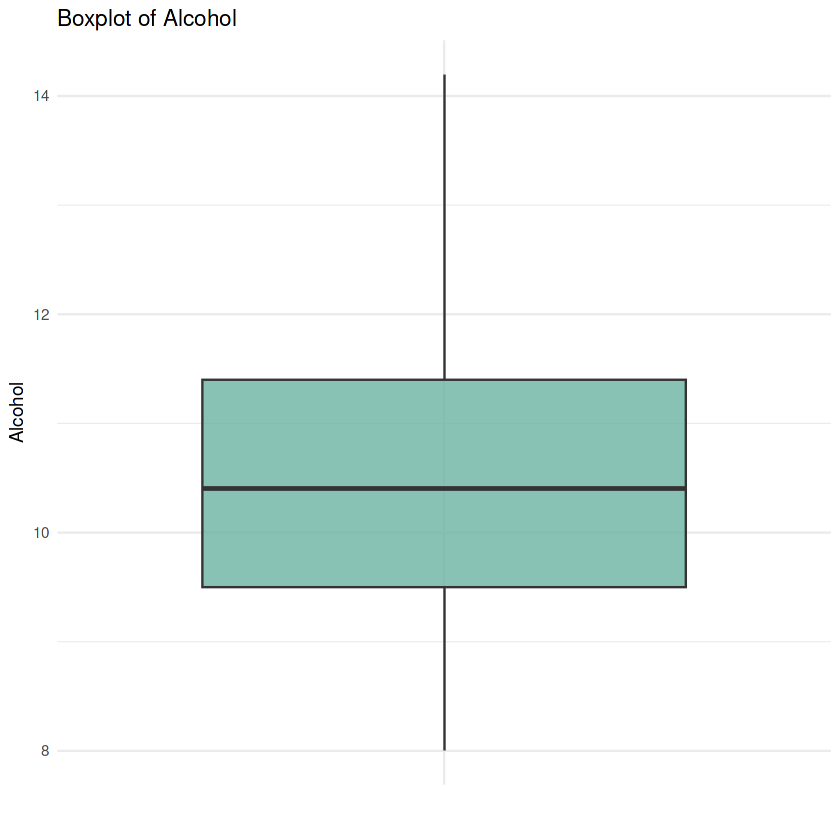

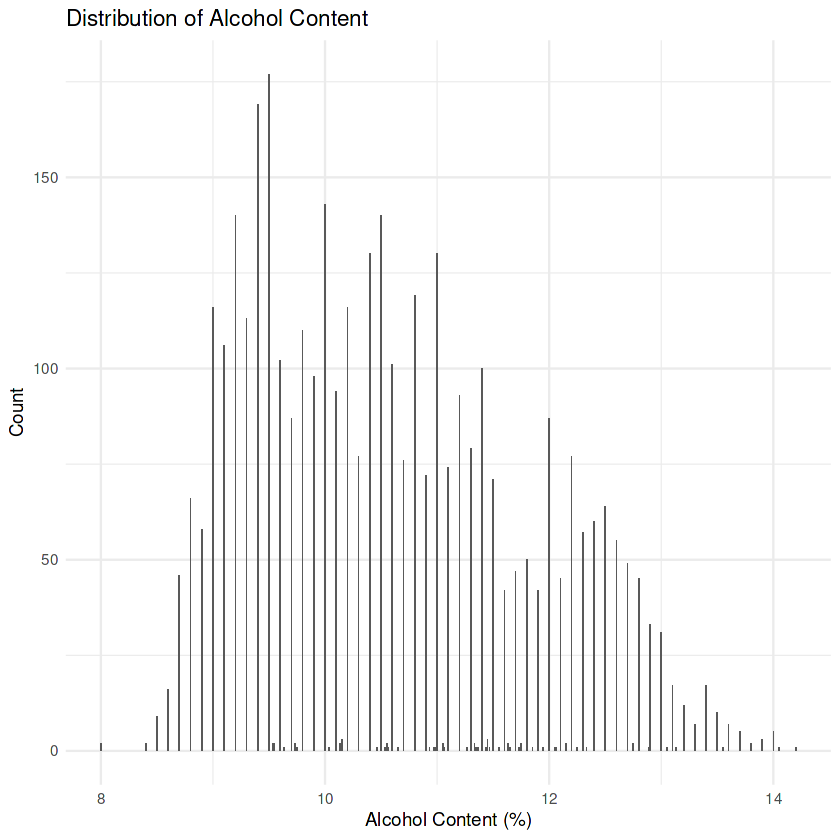

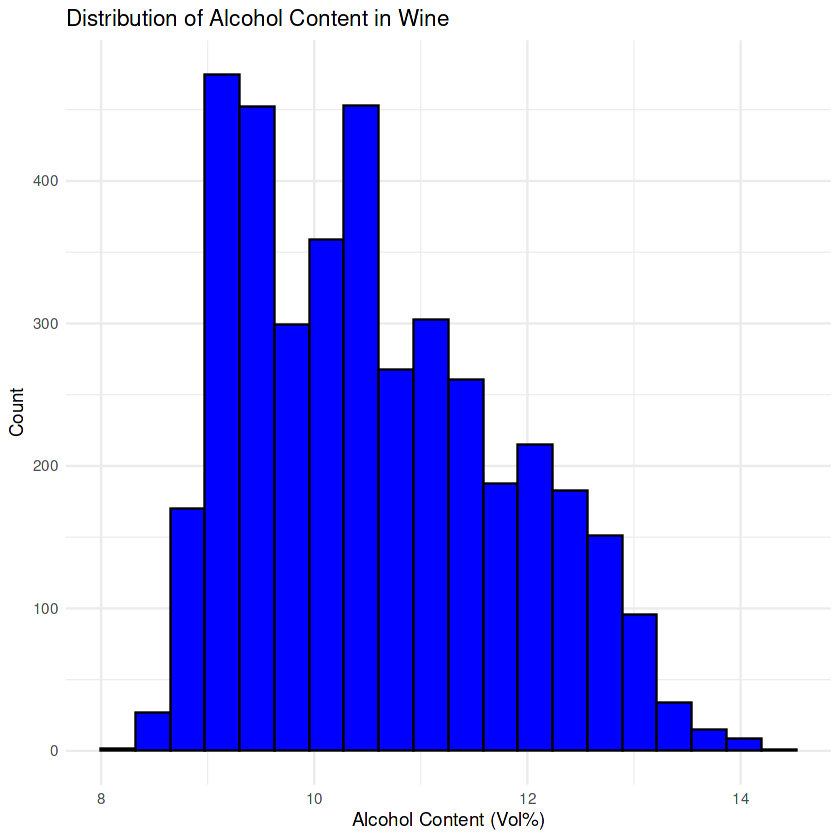

In [166]:
# Distribution plot for alcohol
ggplot(wine.data, aes(x = alcohol)) +
  geom_density(fill = "#69b3a2", alpha = 0.8) +
  labs(title = "Distribution of Alcohol", x = "Alcohol", y = "Density") +
  theme_minimal()

# Boxplot for alcohol
ggplot(wine.data, aes(x = "", y = alcohol)) +
  geom_boxplot(fill = "#69b3a2", alpha = 0.8) +
  labs(title = "Boxplot of Alcohol", x = "", y = "Alcohol") +
  theme_minimal()

ggplot(wine.data, aes(x=alcohol))+
  geom_bar()+
  labs(title="Distribution of Alcohol Content", x="Alcohol Content (%)", y="Count") +
  theme_minimal()

ggplot(wine.data, aes(x = alcohol)) +
  geom_histogram(color = "black", fill = "blue", bins = 20) +
  labs(title = "Distribution of Alcohol Content in Wine", x = "Alcohol Content (Vol%)", y = "Count") +
  theme_minimal()

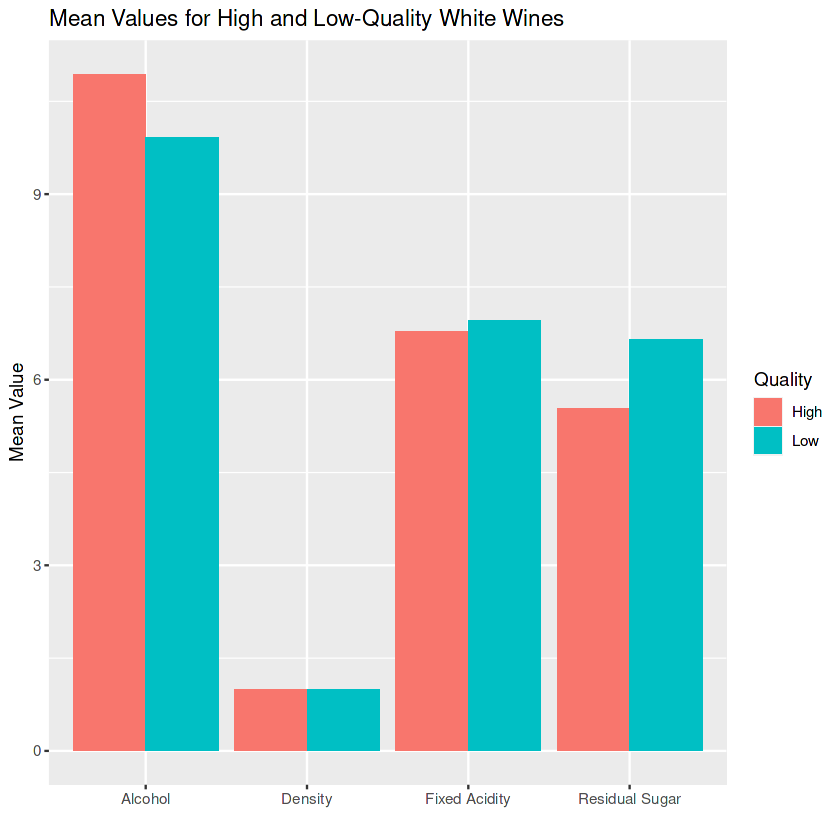

In [167]:
# Create a data frame with mean values for high and low-quality white wines
feature_means <- data.frame(feature = c("Fixed Acidity", "Residual Sugar", "Density", "Alcohol"),
                            quality = c(rep("High", 4), rep("Low", 4)),
                            mean_value = c(6.779, 5.532, 0.993, 10.940, 6.957, 6.656, 0.995, 9.909))

# Create a bar plot to visualize the mean values
ggplot(data = feature_means, aes(x = feature, y = mean_value, fill = quality)) + 
  geom_bar(stat = "identity", position = "dodge") + 
  labs(x = "", y = "Mean Value", fill = "Quality") + 
  ggtitle("Mean Values for High and Low-Quality White Wines")

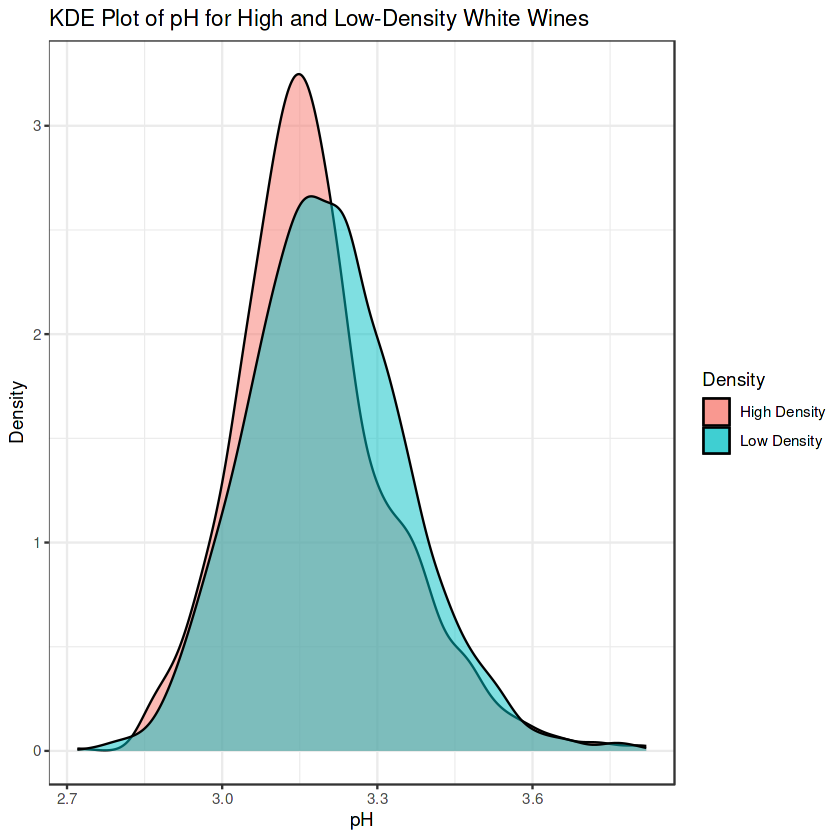

In [168]:
high_density <- wine.data %>% filter(density > 0.995)

# Create a subset of the data for low-density white wines
low_density <- wine.data %>% filter(density <= 0.995)

# Create a KDE plot of pH for both high and low-density white wines
ggplot() + 
  geom_density(data = high_density, aes(x = pH, fill = "High Density"), alpha = 0.5) + 
  geom_density(data = low_density, aes(x = pH, fill = "Low Density"), alpha = 0.5) + 
  labs(title = "KDE Plot of pH for High and Low-Density White Wines", x = "pH", y = "Density", fill = "Density") + 
  theme_bw()

In [169]:
colnames(wine.data)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"             
[13] "quality_rate"         "quality.class"        "binary_quality"

In [170]:
head(wine.data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,quality_rate,quality.class,binary_quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,1,high,High Quality
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,1,high,High Quality
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,1,high,High Quality
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,1,high,High Quality
7,6.2,0.32,0.16,7.0,0.045,30,136,0.9949,3.18,0.47,9.6,6,1,high,High Quality
10,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11.0,6,1,high,High Quality


In [171]:
# Unscaled Features
X <- wine.data %>% select(-c("quality_rate","quality.class"))

# Target Variable
y <- wine.data[, c("quality_rate")]

In [172]:
table(y)

y
   0    1 
1348 2613 

In [173]:
library(caret)
wine.data$quality_rate <- factor(wine.data$quality_rate)
downsampled_wine_data <- downSample(x = wine.data[, -ncol(wine.data)], y = wine.data$quality_rate)

In [174]:
table(downsampled_wine_data$quality_rate)


   0    1 
1348 1348 

In [214]:
# create feature matrix and target label
X <- as.matrix(downsampled_wine_data[,1:11])
y <- downsampled_wine_data[,12]

# normalize the data
X_norm <- scale(X)

# split the data into training and testing sets
set.seed(123)
train_idx <- sample(1:nrow(X_norm), 0.7*nrow(X_norm))
X_train <- X_norm[train_idx,]
y_train <- y[train_idx]
X_test <- X_norm[-train_idx,]
y_test <- y[-train_idx]

# fit machine learning models
library(rpart)
library(randomForest)
library(adabag)
library(gbm)
library(xgboost)

set.seed(81)


In [176]:
# decision tree
tree_model <- rpart(y_train ~ ., data=data.frame(X_train, y_train))





In [215]:
# random forest
rf_model <- randomForest(X_train, y_train)



In [178]:
# adaboost
ada_model <- ada_model <- gbm.fit(
  x = X_train,
  y = y_train,
  distribution = "adaboost",
  n.trees = 10
)

ERROR: Error in gbm.fit(x = X_train, y = y_train, distribution = "adaboost", : This version of AdaBoost requires the response to be in {0,1}


In [ ]:
xgb_model <- xgboost(data = as.matrix(X_train), label = y_train,
                     nrounds = 100, max_depth = 4)

In [ ]:
# evaluate models on test set
library(caret)

tree_preds <- predict(tree_model, newdata = as.data.frame(X_test), type = "class")
rf_preds <- predict(rf_model, newdata = as.data.frame(X_test))

tree_acc <- confusionMatrix(tree_preds, y_test)$overall["Accuracy"]
rf_acc <- confusionMatrix(rf_preds, y_test)$overall["Accuracy"]

In [ ]:
tree_acc 
rf_acc
svm_acc
knn_acc

In [ ]:
library(e1071)
svm_model <- svm(y_train ~ ., data=X_train, kernel="linear", cost=10)

# Make predictions on the test set
svm_preds <- predict(svm_model, newdata=X_test)

# Evaluate the accuracy of the model
library(caret)
svm_acc <- confusionMatrix(svm_preds, y_test)$overall["Accuracy"]

In [ ]:
head(cbind(y_train,X_train))

In [ ]:

# train the KNN model with k = 5
knn_model <- train(X_train, y_train, method = "knn", preProcess = "scale", 
                   tuneGrid = data.frame(k = 5), trControl = trainControl(method = "cv"))

# predict on the test set
knn_preds <- predict(knn_model, X_test)

# calculate the accuracy
knn_acc <- confusionMatrix(knn_preds, y_test)$overall["Accuracy"]

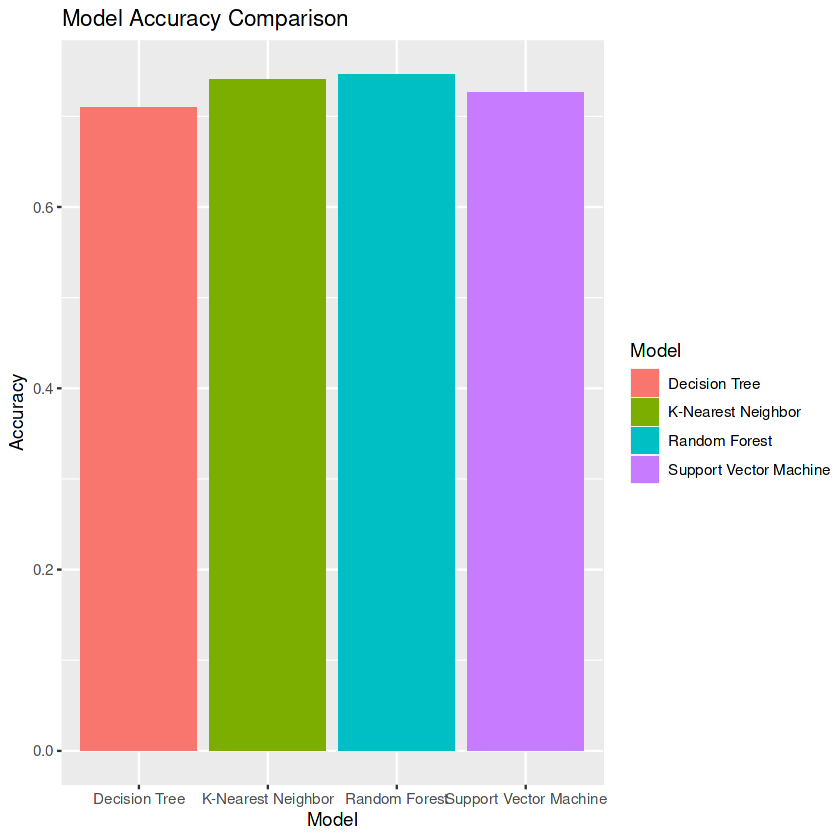

In [191]:
# Create a data frame with model names and accuracy values
model_names <- c("Decision Tree", "Random Forest", "Support Vector Machine", "K-Nearest Neighbor")
accuracy_values <- c(tree_acc, rf_acc, svm_acc, knn_acc)
data <- data.frame(model_names, accuracy_values)

# Create the bar plot
ggplot(data, aes(x = model_names, y = accuracy_values, fill = model_names)) + 
  geom_bar(stat = "identity") +
  labs(title = "Model Accuracy Comparison", x = "Model", y = "Accuracy") +
  scale_fill_discrete(name = "Model")

In [ ]:
library(glmnet)

# Fit L1-penalized logistic regression model
lasso_model <- cv.glmnet(x = X_train, y = y_train, alpha = 1 , type.measure = "class")

# Plot cross-validated deviance vs. log(lambda)
plot(lasso_model)

# Select optimal value of lambda based on cross-validation
lambda_min <- lasso_model$lambda.min

# Fit L1-penalized logistic regression model with optimal lambda
lasso_model_opt <- glmnet(x = X, y = y, alpha = 1, lambda = lambda_min)

# Extract important features
lasso_coef <- coef(lasso_model_opt, s = lambda_min)
lasso_coef <- lasso_coef[-1,] # exclude intercept

# Plot magnitude of coefficients
plot(lasso_coef, xlab = "Features", ylab = "Magnitude", main = "Lasso Regression Coefficients",names.arg=names(lasso_coef))